# Python Solutions to Tutorial 05

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat 

df = pd.read_csv('Tutorial05_data.csv')

## 1.	The thickness of a printed circuit board is an important quality parameter. Data on board thickness (in inches) are given in the dataset for 25 samples of three boards each.  Set up X-bar and R control charts. Is the process in statistical control?

R chart

In [2]:
m = 25 
R_accum = 0 
Rs = [] 
for n in range (1,m+1):        
    max = df.loc[df['Sample Number']==n,'Thickness'].max()
    min = df.loc[df['Sample Number']==n,'Thickness'].min()
    R = max-min
    R_accum = R_accum + R
    Rs.append(R)
CL_R = R_accum/m
print(CL_R)
UCL_R = 2.574 * CL_R 
LCL_R = 0
print(LCL_R, UCL_R)

0.0009199999999999997
0 0.002368079999999999


In [3]:
for n in range(1,m+1):
    if Rs[n-1] >= UCL_R: 
         print(n, 'is out of bounds')

15 is out of bounds


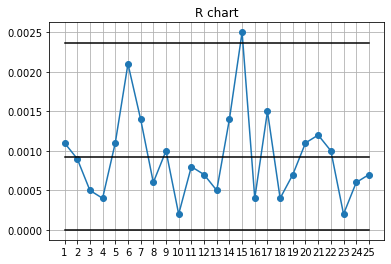

In [4]:
# also see the plot:
ucl_line = np.full(m,UCL_R) 
lcl_line = np.full(m,LCL_R) 
cl_line = np.full(m,CL_R) 
plt.plot(Rs,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('R chart')
plt.show()

Therefore, the process is out of control. 

## 2.	What is the new value of R-bar after deleting the points lying out of bounds?

Remove 15: 

In [5]:
m = 25 
R_accum=0
Rs = [] 
for n in range (1,m+1):        
    max = df.loc[df['Sample Number']==n,'Thickness'].max()
    min = df.loc[df['Sample Number']==n,'Thickness'].min()
    R = max-min
    if n !=15:
        R_accum = R_accum+R
        Rs.append(R)
    else:
        Rs.append(np.nan)
CL_R = R_accum/(m-1)
print(CL_R)
UCL_R = 2.574*CL_R 
LCL_R = 0
print(LCL_R, UCL_R)

0.0008541666666666663
0 0.0021986249999999988


In [6]:
for n in range(1,m+1):
    if Rs[n-1] >= UCL_R: 
         print(n, 'is out of bounds')

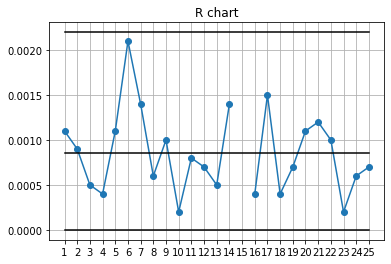

In [7]:
ucl_line = np.full(m,UCL_R) 
lcl_line = np.full(m,LCL_R) 
cl_line = np.full(m,CL_R) 
plt.plot(Rs,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('R chart')
plt.show()

now R chart is in control. The new value of R-bar is:

In [8]:
print(CL_R)

0.0008541666666666663


## 3.	Based on the R chart obtained in the previous question, what is the estimate value of the standard deviation for this process?

In [9]:
sigma = CL_R/1.693
print(sigma)

0.0005045284504823781


## 4.	What are the new values for the CL, UCL and LCL in the X-bar chart when all the points lying out of bounds are excluded?

X-bar chart

In [10]:
m = 25
x_bar_accum = 0
x_bars = []

for n in range (1,m+1):        
    x_bar = df.loc[df['Sample Number']==n,'Thickness'].mean()
    x_bars.append(x_bar)
    x_bar_accum = x_bar_accum+x_bar

CL_x_bar = x_bar_accum/m
print(CL_x_bar)

UCL_x_bar = CL_x_bar + 1.023 * CL_R # A2
LCL_x_bar = CL_x_bar - 1.023 * CL_R # A2

print(UCL_x_bar, LCL_x_bar)

0.062952
0.0638258125 0.06207818749999999


In [11]:
for n in range(1,m+1):
    if (x_bars[n-1] > UCL_x_bar or x_bars[n-1] < LCL_x_bar ): 
         print(n, 'is out of bounds')

14 is out of bounds
22 is out of bounds


take out 14 and 22:

In [12]:
x_bar_accum = 0
x_bars = []
for n in range (1,m+1):        
    x_bar = df.loc[df['Sample Number']==n,'Thickness'].mean()
    if (n!=14 and n!=22):
        x_bar_accum = x_bar_accum + x_bar
        x_bars.append(x_bar)
    else:
        x_bars.append(np.nan)
             
CL_x_bar = x_bar_accum/(m-2)
print(CL_x_bar)
UCL_x_bar = CL_x_bar + 1.023*CL_R
LCL_x_bar = CL_x_bar - 1.023*CL_R
print(UCL_x_bar, LCL_x_bar)

0.06295507246376811
0.06382888496376811 0.06208125996376811


In [13]:
for n in range(1,m+1):
    if (x_bars[n-1] > UCL_x_bar or x_bars[n-1] < LCL_x_bar ): 
         print(n, 'is out of bounds')

No points are out of control, so the final values are:

In [14]:
print(CL_x_bar, UCL_x_bar, LCL_x_bar)

0.06295507246376811 0.06382888496376811 0.06208125996376811


## 5.	Now set up X-bar and S charts for this process. Is the process in statistical control?

S chart

In [15]:
m = 25 
s_accum = 0 
Ss = [] 
for n in range (1,m+1):        
    s = df.loc[df['Sample Number']==n,'Thickness'].std()
    s_accum = s_accum + s
    Ss.append(s)
CL_s = s_accum/m
print(CL_s)

UCL_s = 2.568 * CL_s 
LCL_s = 0
print(LCL_s, UCL_s)

0.00047817114987414434
0 0.0012279435128768027


In [16]:
for n in range(1,m+1):
    if Ss[n-1] >= UCL_s: 
         print(n, 'is out of bounds')

15 is out of bounds


Therefore, the process is out of control.

## 6.	After deleting the out-of-control points, what should be the upper and lower control limits for the S chart?

Take 15 out:

In [17]:
m = 25 
s_accum = 0 
Ss = [] 
for n in range (1,m+1):        
    s = df.loc[df['Sample Number']==n,'Thickness'].std()
    if n != 15:
        s_accum = s_accum + s
        Ss.append(s)
    else:
        Ss.append(np.nan)
        
CL_s = s_accum/(m-1)
print(CL_s)
UCL_s = 2.568 * CL_s 
LCL_s = 0
print(LCL_s, UCL_s)

0.000445997727414703
0 0.0011453221640009574


In [18]:
for n in range(1,m+1):
    if Ss[n-1] >= UCL_s: 
         print(n, 'is out of bounds')

No points out of control, so S chart is in control.

In [19]:
print(LCL_s, UCL_s)

0 0.0011453221640009574


## 7.	Based on the S chart obtained in the previous question, what is the estimate of the standard deviation for this process?

In [20]:
sigma=CL_s/0.8862
print(sigma)

0.0005032698345911792


## 8.	What are the upper and lower control limits for the in-control X-bar chart?

In [21]:
m = 25
x_bar_accum = 0
x_bars = []

for n in range (1,m+1):        
    x_bar = df.loc[df['Sample Number']==n,'Thickness'].mean()
    x_bars.append(x_bar)
    x_bar_accum = x_bar_accum+x_bar

CL_x_bar = x_bar_accum/m
print(CL_x_bar)

UCL_x_bar = CL_x_bar + 1.954 * CL_s 
LCL_x_bar = CL_x_bar - 1.954 * CL_s 

print(UCL_x_bar, LCL_x_bar)

0.062952
0.06382347955936832 0.06208052044063166


In [22]:
for n in range(1,m+1):
    if (x_bars[n-1] > UCL_x_bar or x_bars[n-1] < LCL_x_bar ): 
         print(n, 'is out of bounds')

14 is out of bounds
22 is out of bounds


Take out 14 and 22

In [23]:
x_bar_accum = 0
x_bars = []
for n in range (1,m+1):        
    x_bar = df.loc[df['Sample Number']==n,'Thickness'].mean()
    if (n!=14 and n!=22):
        x_bar_accum = x_bar_accum + x_bar
        x_bars.append(x_bar)
    else:
        x_bars.append(np.nan)
             
CL_x_bar = x_bar_accum/(m-2)
print(CL_x_bar)

UCL_x_bar = CL_x_bar + 1.954 * CL_s 
LCL_x_bar = CL_x_bar - 1.954 * CL_s 

print(UCL_x_bar, LCL_x_bar)

0.06295507246376811
0.06382655202313643 0.06208359290439978


In [24]:
for n in range(1,m+1):
    if (x_bars[n-1] > UCL_x_bar or x_bars[n-1] < LCL_x_bar ): 
         print(n, 'is out of bounds')

No points out of control now. Final values:

In [25]:
print(UCL_x_bar, LCL_x_bar)

0.06382655202313643 0.06208359290439978


## 9.	The concentration of the active ingredient in a liquid cleaner produced in a continuous chemical process is monitored by X-bar and S charts. A batch is taken as a rational subgroup. The sample sizes vary from batch to batch, with production ranging from four to eight but with six as the predominant sample size. The past 12 batches of output resulted in the data presented in the dataset. Set up X-bar and S charts for this process. Is it in statistical control?

For variable sample size, we have the formulas:

$\bar{\bar{x}} = \frac{\sum_{j=1}^m{n_j \bar{x}_j}}{\sum_{j=1}^m n_j}$ and 

$\bar{s}=[\frac{\sum_{j=1}^m{(n_j -1)s_j^2}}{\sum_{j=1}^m n_j - m}]^{1/2}$

Here we use these two to build the control charts


Find $n_j$'s and $\sum_{j=1}^m n_j$

In [26]:
m = 12 
n_j = []
for k in range(1,m+1):
    n = df.loc[df['Batch']==k,'Concentration'].size
    n_j.append(n)
n_sum = np.sum(n_j)
print(n_sum)

65


Find S-bar and S_j's

In [27]:
m = 12
s_bar2_num = 0
Ss = []
for k in range(1,m+1):
    s = df.loc[df['Batch']==k,'Concentration'].std()
    Ss.append(s)
    s_bar2_num = s_bar2_num + (n_j[k-1]-1)*(s**2)
s_bar2_den = n_sum-m
s_bar = np.sqrt(s_bar2_num/s_bar2_den)
print(s_bar)

1.271495677484447


## S chart

In [28]:
UCL_s = []
LCL_s = []

for k in range(1,m+1):
    if n_j[k-1] == 4:
        UCL = 2.266*s_bar
        LCL = 0
    elif n_j[k-1] == 5:
        UCL = 2.089*s_bar
        LCL = 0
    elif n_j[k-1] == 6:
        UCL = 1.97*s_bar
        LCL = 0.03*s_bar
    elif n_j[k-1] == 8:
        UCL = 1.815*s_bar
        LCL = 0.185*s_bar
    UCL_s.append(UCL)
    LCL_s.append(LCL)

In [29]:
for k in range(1,m+1):
    if (Ss[k-1] > UCL_s[k-1] or Ss[k-1] < LCL_s[k-1] ): 
         print(j, 'is out of bounds')    

No point is out of bounds, so S chart is in control.

## X-bar chart

Find $\bar{\bar{x}}$ and $\bar{x}_j$'s

In [30]:
m = 12
x_bars = []
x_bar_num = 0
for k in range(1,m+1):
    x_bar = df.loc[df['Batch']==k,'Concentration'].mean()
    x_bars.append(x_bar)
    x_bar_num = x_bar_num + n_j[k-1]*x_bar
x_bar_bar = x_bar_num/n_sum
print(x_bar_bar)

96.52923076923076


In [31]:
UCL_x_bar = []
LCL_x_bar = []

for k in range(1,m+1):
    if n_j[k-1] == 4:
        UCL = x_bar_bar + 1.628*s_bar
        LCL = x_bar_bar - 1.628*s_bar
    elif n_j[k-1] == 5:
        UCL = x_bar_bar+1.427*s_bar
        LCL = x_bar_bar-1.427*s_bar
    elif n_j[k-1] == 6:
        UCL = x_bar_bar + 1.287*s_bar
        LCL = x_bar_bar - 1.287*s_bar
    elif n_j[k-1] == 8:
        UCL = x_bar_bar + 1.099*s_bar
        LCL = x_bar_bar - 1.099*s_bar
    UCL_x_bar.append(UCL)
    LCL_x_bar.append(LCL)

In [32]:
for j in range(1,m+1):
    if (x_bars[j-1] > UCL_x_bar[j-1] or x_bars[j-1] < LCL_x_bar[j-1] ): 
         print(j, 'is out of bounds')    

x-bar is also in control, so the process is in control

## 10.	What is the value of S-bar?

In [33]:
print(s_bar)

1.271495677484447


## 11.	What is the estimate of the mean of this process?

In [34]:
print(x_bar_bar)

96.52923076923076
